## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

In [2]:
import tensorflow as tf
from tensorflow import keras
import yfinance as yf

## 2. Load Stock Data

In [3]:
stock_names = ['MSFT', 'AAPL', 'TSLA', 'META', 'NVDA']

In [124]:
data = yf.download(stock_names, period='60d', interval='5m')
data.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                      \
                                 AAPL        META        MSFT        NVDA   
Datetime                                                                    
2022-08-17 09:30:00-04:00  173.169998  177.219696  290.480011  185.279007   
2022-08-17 09:35:00-04:00  173.589996  176.740997  290.820007  185.839996   
2022-08-17 09:40:00-04:00  173.570007  175.920700  290.769989  184.490005   
2022-08-17 09:45:00-04:00  174.029099  176.229996  291.410004  184.425003   
2022-08-17 09:50:00-04:00  174.000000  176.320099  291.690002  184.164993   

                                            Close                          \
                                 TSLA        AAPL        META        MSFT   
Datetime                                                                    
2022-08-17 09:30:00-04:00  304.369995  173.169998  177.219696  290.480011   
2022-08-17 09:35:00-04:00  304.376678  173.589996  176.740997  290.820007   
2022-08-17 09:40:00-04:00  302.383331  173.570007  175.920700  290.769989   
2022-08-17 09:45:00-04:00  302.769989  174.029099  176.229996  291.410004   
2022-08-17 09:50:00-04:00  304.153870  174.000000  176.320099  291.690002   

                                                   ...        Open  \
                                 NVDA        TSLA  ...        AAPL   
Datetime                                           ...               
2022-08-17 09:30:00-04:00  185.279007  304.369995  ...  173.250000   
2022-08-17 09:35:00-04:00  185.839996  304.376678  ...  173.169998   
2022-08-17 09:40:00-04:00  184.490005  302.383331  ...  173.570007   
2022-08-17 09:45:00-04:00  184.425003  302.769989  ...  173.570007   
2022-08-17 09:50:00-04:00  184.164993  304.153870  ...  174.029999   

                                                                           \
                                 META        MSFT        NVDA        TSLA   
Datetime                                                                    
2022-08-17 09:30:00-04:00  177.720001  290.273987  185.229996  303.396667   
2022-08-17 09:35:00-04:00  177.195007  290.494293  185.289993  304.016663   
2022-08-17 09:40:00-04:00  176.750107  290.820007  185.815903  304.467926   
2022-08-17 09:45:00-04:00  175.932999  290.799988  184.509995  302.333344   
2022-08-17 09:50:00-04:00  176.210007  291.369995  184.399994  302.852142   

                            Volume                                      
                              AAPL     META     MSFT     NVDA     TSLA  
Datetime                                                                
2022-08-17 09:30:00-04:00  4569900  1249843  1098350  2060174  1409167  
2022-08-17 09:35:00-04:00  2075670   451661   344495  1160268   544756  
2022-08-17 09:40:00-04:00  1464049   563750   328038  1187439   615069  
2022-08-17 09:45:00-04:00  1355095   323648   324364   930803   480211  
2022-08-17 09:50:00-04:00  1211123   452530   328764  1051061   827799  

[5 rows x 30 columns]

In [125]:
datetime = data.index
datetime

DatetimeIndex(['2022-08-17 09:30:00-04:00', '2022-08-17 09:35:00-04:00',
               '2022-08-17 09:40:00-04:00', '2022-08-17 09:45:00-04:00',
               '2022-08-17 09:50:00-04:00', '2022-08-17 09:55:00-04:00',
               '2022-08-17 10:00:00-04:00', '2022-08-17 10:05:00-04:00',
               '2022-08-17 10:10:00-04:00', '2022-08-17 10:15:00-04:00',
               ...
               '2022-11-09 15:15:00-05:00', '2022-11-09 15:20:00-05:00',
               '2022-11-09 15:25:00-05:00', '2022-11-09 15:30:00-05:00',
               '2022-11-09 15:35:00-05:00', '2022-11-09 15:40:00-05:00',
               '2022-11-09 15:45:00-05:00', '2022-11-09 15:50:00-05:00',
               '2022-11-09 15:55:00-05:00', '2022-11-09 16:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=4681, freq=None)

In [126]:
data = data['Close']
data.head()

,AAPL,META,MSFT,NVDA,TSLA
Datetime,,,,,
2022-08-17 09:30:00-04:00,173.169998,177.219696,290.480011,185.279007,304.369995
2022-08-17 09:35:00-04:00,173.589996,176.740997,290.820007,185.839996,304.376678
2022-08-17 09:40:00-04:00,173.570007,175.920700,290.769989,184.490005,302.383331
2022-08-17 09:45:00-04:00,174.029099,176.229996,291.410004,184.425003,302.769989
2022-08-17 09:50:00-04:00,174.000000,176.320099,291.690002,184.164993,304.153870


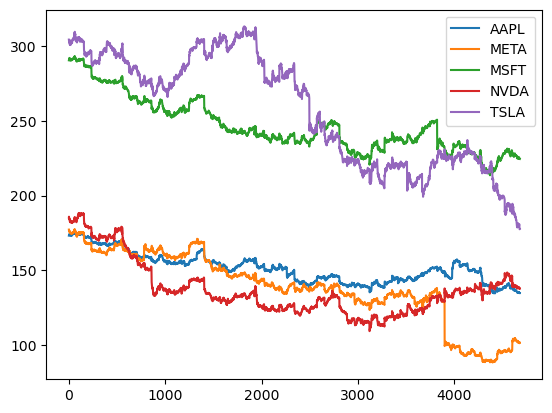

In [136]:
# Visualize stock prices
for stock in data.columns:
    plt.plot(data.index, data[stock], label=stock)
plt.legend()

In [128]:
data = data.reset_index().drop('Datetime', axis=1)
data.head()

,AAPL,META,MSFT,NVDA,TSLA
0,173.169998,177.219696,290.480011,185.279007,304.369995
1,173.589996,176.740997,290.820007,185.839996,304.376678
2,173.570007,175.920700,290.769989,184.490005,302.383331
3,174.029099,176.229996,291.410004,184.425003,302.769989
4,174.000000,176.320099,291.690002,184.164993,304.153870


## 3. Perform Data Preprocessing

In [48]:
from sklearn.preprocessing import MinMaxScaler

# Scale data
scalers = []
df = pd.DataFrame()

for stock in data.columns:
    scaler_stock = MinMaxScaler(feature_range=(0,1))
    df[stock] = pd.Series(scaler_stock.fit_transform(np.array(data[stock]).reshape(-1, 1)).reshape(-1))
    scalers.append(scaler_stock)

df.head()

,AAPL,META,MSFT,NVDA,TSLA
0,0.929459,0.996857,0.964505,0.961992,0.935449
1,0.939570,0.991490,0.968770,0.969092,0.935498
2,0.939089,0.982293,0.968142,0.952006,0.920806
3,0.950142,0.985761,0.976170,0.951183,0.923656
4,0.949441,0.986771,0.979681,0.947893,0.933856


In [50]:
# Split into training, validation, and testing sets
train_size = int(df.shape[0]*0.65)
val_size = int(df.shape[0]*0.15)
test_size = df.shape[0] - train_size - val_size
print(train_size, val_size, test_size)

3042 702 937


In [73]:
train_data = df.iloc[:train_size, :].values
val_data = df.iloc[train_size:train_size+val_size, :].values
test_data = df.iloc[train_size+val_size:df.shape[0], :].values
print(train_data.shape, val_data.shape, test_data.shape)

(3042, 5) (702, 5) (937, 5)


In [88]:
def create_dataset(dataset, num_stocks, time_step=1):
    '''
    Split data into timesteps of length 60 (data from last 5 hours)
    '''
    dataX, dataY = [], []
    for i in range(num_stocks):
        for j in range(len(dataset)-time_step-1):
            a = dataset[j:(j+time_step), i]
            dataX.append(a)
            dataY.append(dataset[j + time_step, i])
            
    return np.array(dataX), np.array(dataY)

In [89]:
# Split data into blocks of 60 samples
time_step = 60
num_stocks = train_data.shape[1]
X_train, y_train = create_dataset(train_data, num_stocks, time_step)
X_val, y_val = create_dataset(val_data, num_stocks, time_step)
X_test, y_test = create_dataset(test_data, num_stocks, time_step)

In [90]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(14905, 60) (14905,)
(3205, 60) (3205,)
(4380, 60) (4380,)


## Train Model

In [91]:
# Create model
model_combined = tf.keras.Sequential((
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(60,1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1))
)
model_combined.compile(loss='mean_squared_error', optimizer='adam')

In [92]:
# Train model
history = model_combined.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=40,
    validation_data=(X_val, y_val),
)

Epoch 1/40
932/932 [==============================] - 57s 56ms/step - loss: 0.0020 - val_loss: 4.5797e-04
Epoch 2/40
932/932 [==============================] - 45s 48ms/step - loss: 2.4679e-04 - val_loss: 3.0775e-04
Epoch 3/40
932/932 [==============================] - 36s 39ms/step - loss: 1.9676e-04 - val_loss: 1.9533e-04
Epoch 4/40
932/932 [==============================] - 35s 38ms/step - loss: 1.6041e-04 - val_loss: 1.7363e-04
Epoch 5/40
932/932 [==============================] - 34s 37ms/step - loss: 1.3177e-04 - val_loss: 1.3175e-04
Epoch 6/40
932/932 [==============================] - 35s 38ms/step - loss: 1.0676e-04 - val_loss: 1.1743e-04
Epoch 7/40
932/932 [==============================] - 34s 36ms/step - loss: 1.0350e-04 - val_loss: 1.0029e-04
Epoch 8/40
932/932 [==============================] - 36s 38ms/step - loss: 8.5264e-05 - val_loss: 1.1117e-04
Epoch 9/40
932/932 [==============================] - 33s 36ms/step - loss: 8.1415e-05 - val_loss: 9.1190e-05
Epoch 10/40
93

In [109]:
size = int(len(X_test)/len(df.columns))
X_test_stock = X_test[0:size]
y_test_stock = y_test[0:size]
preds = model_combined.predict(X_test_stock)

RMSE on AAPL: 0.4274661133476943
RMSE on META: 1.1284071566335552
RMSE on MSFT: 0.8309284111251232
RMSE on NVDA: 0.710781729295556
RMSE on TSLA: 0.9840895600701143


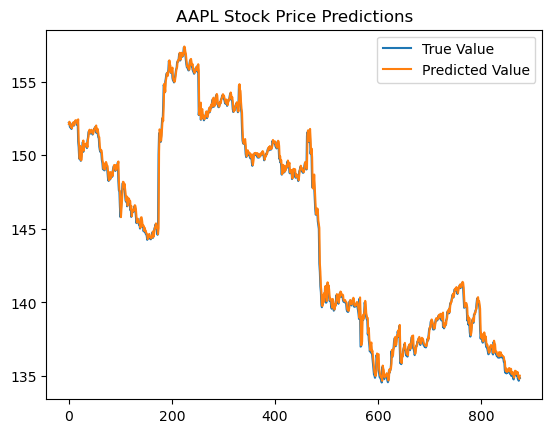

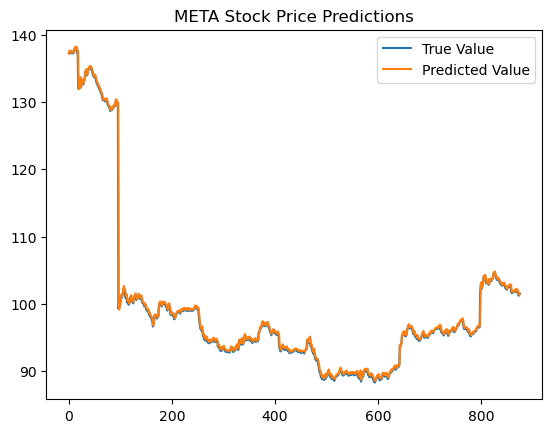

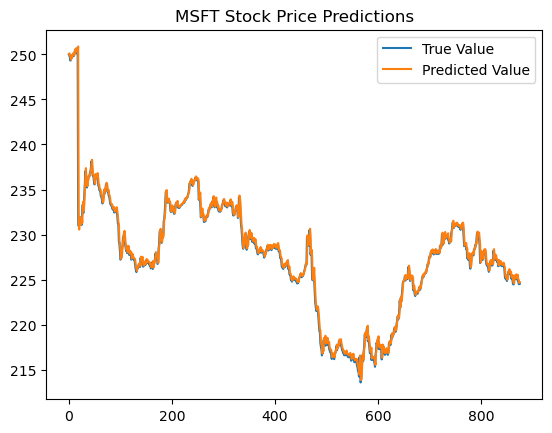

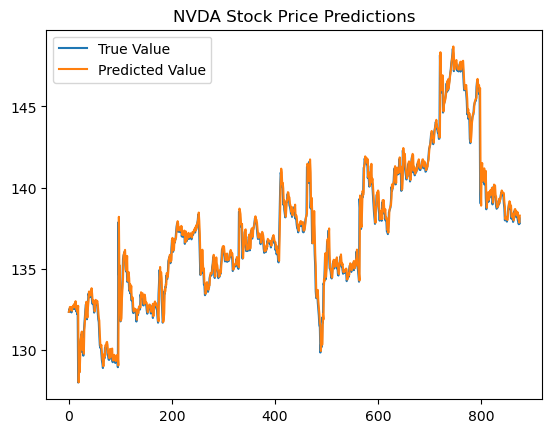

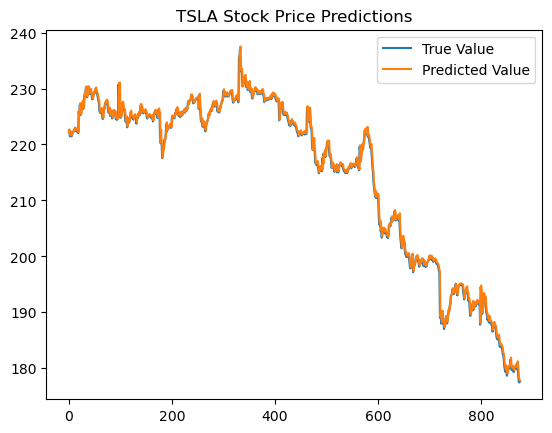

In [133]:
# Make predictions
size = int(len(X_test)/len(df.columns))
for i in range(len(df.columns)):
    X_test_stock = X_test[i*size:(i+1)*size]
    y_test_stock = y_test[i*size:(i+1)*size]
    
    y_preds = scalers[i].inverse_transform(model_combined.predict(X_test_stock).reshape(-1, 1))
    
    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(scalers[i].inverse_transform(y_test_stock.reshape(-1, 1)),y_preds))
    print('RMSE on {}: {}'.format(df.columns[i], rmse))
    
    # Visualize predictions
    fig = plt.figure()
    plt.plot(scalers[i].inverse_transform(y_test_stock.reshape(-1, 1)), label='True Value')
    plt.plot(y_preds, label='Predicted Value')
    plt.legend()
    plt.title('{} Stock Price Predictions'.format(df.columns[i]))

In [134]:
# Save model
model_combined.save('Models/model_multi_stock_1')

INFO:tensorflow:Assets written to: Models/model_multi_stock_1\assets


INFO:tensorflow:Assets written to: Models/model_multi_stock_1\assets
